In [1]:
import pandas as pd
import numpy as np

from Analysis.AnalyzeSrc.BasicDataInspection import (
    DataInspector, 
    DataTypesInspectionStrategy, 
    SummaryStatisticsInspectionStrategy
)
from Analysis.AnalyzeSrc.MissingValueAnalysis import SimpleMissingValuesAnalysis
from Analysis.AnalyzeSrc.UnivariateAnalysis import (
    UnivariateAnalyzer, 
    NumericalUnivariateAnalysis, 
    CategoricalUnivariateAnalysis
)
from Analysis.AnalyzeSrc.MultivariateAnalysis import SimpleMultivariateAnalysis
from Analysis.AnalyzeSrc.BivariateAnalysis import (
    BivariateAnalyzer,
    NumericalVsNumericalAnalysis,
    CategoricalVsNumericalAnalysis,
    NumericalFeaturesVsTargetAnalysis,
    CategoricalFeaturesVsTargetAnalysis
)

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the data
# Assuming you have already extracted the data into the 'Dataset/Extracted/' folder

train_data_path = '../Dataset/Extracted/train.csv'
test_data_path = '../Dataset/Extracted/test.csv'
sample_submission_path = '../Dataset/Extracted/sample_submission.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
sample_submission_df = pd.read_csv(sample_submission_path)

In [3]:
# Convert columns that are numeric but stored as strings
numeric_str_cols = ['humidity', 'wind_speed', 'pressure']
for col in numeric_str_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

# Check for data types after conversion
print('======================')
print('TRAIN DF MODIFIED')
print(train_df.dtypes[numeric_str_cols + ['efficiency']])
print('======================')
print('TEST DF MODIFIED')
print(test_df.dtypes[numeric_str_cols])
print('======================')

TRAIN DF MODIFIED
humidity      float64
wind_speed    float64
pressure      float64
efficiency    float64
dtype: object
TEST DF MODIFIED
humidity      float64
wind_speed    float64
pressure      float64
dtype: object


In [4]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(train_df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            19873 non-null  float64
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          19881 non-null  float64
 12  pressure            19865 non-null  float64
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   

In [5]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(train_df)


Summary Statistics (Numerical Features):
                 id   temperature    irradiance      humidity     panel_age  \
count  20000.000000  18999.000000  19013.000000  19873.000000  18989.000000   
mean    9999.500000     25.077241    501.273896     50.066170     17.509758   
std     5773.647028     12.513129    250.926590     28.709656     10.097557   
min        0.000000      0.000000   -597.278646      0.010714      0.001264   
25%     4999.750000     16.853522    332.227277     25.273574      8.777905   
50%     9999.500000     24.720345    499.654730     50.224152     17.497731   
75%    14999.250000     32.848917    668.416734     74.513994     26.340761   
max    19999.000000    147.394168   1537.810349     99.995202     34.998379   

       maintenance_count  soiling_ratio       voltage       current  \
count       18973.000000   18990.000000  19007.000000  19023.000000   
mean            4.012070       0.698879     16.242251      1.713396   
std             2.002268       0.


Missing Values Count by Column:
temperature           1001
irradiance             987
humidity               127
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed             119
pressure               135
error_code            5912
installation_type     5028
dtype: int64

Visualizing Missing Values...


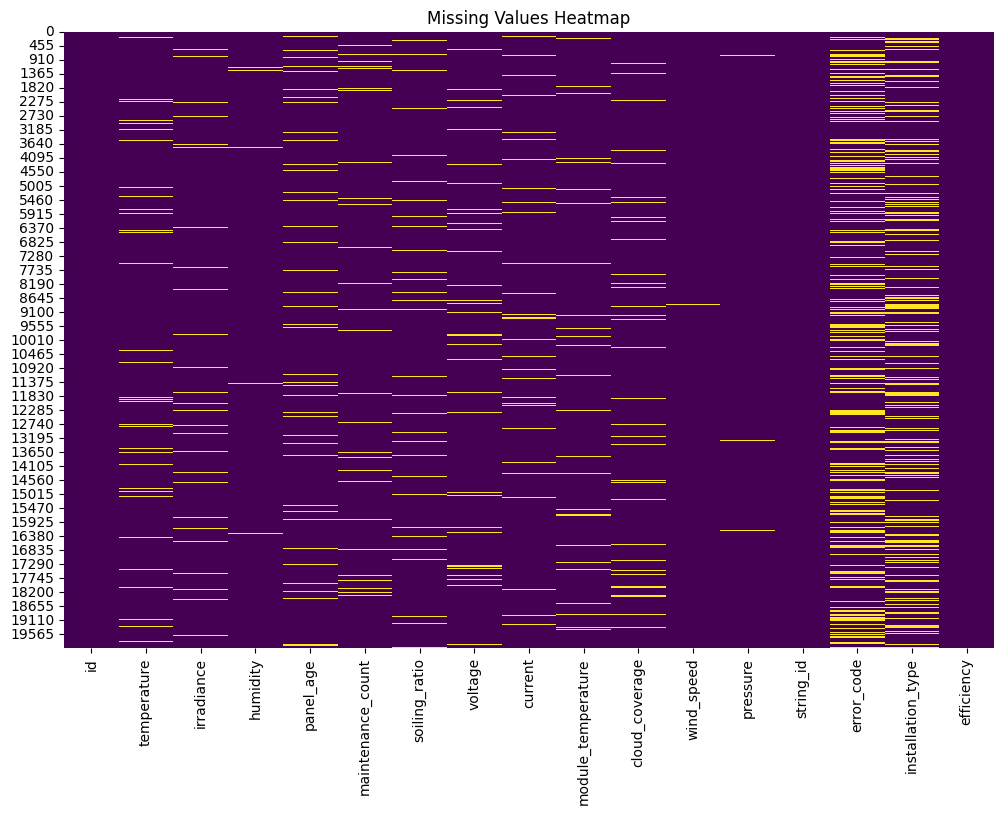

In [6]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(train_df)

# Missing Values Heatmap Insights

#### **1. Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

#### **2. Identifying Columns with Missing Data:**
- Look for columns with significant amounts of yellow. These columns have a higher proportion of missing data.
  - For instance, in the above heatmap, columns like `temperature`, `irradiance`, `panel_age`, `maintenance_count`, `soiling_ratio`, `voltage`, `current`, `module_temperature` and `cloud_coverage` have total 5% as yellow, indicating that these features have missing values.
  - And the columns `error_code` and `installation_type` have total 25% as yellow, indicating that these features have substantial amount of missing values.

#### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**: If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be randomly distributed.
- **Structured Missingness**: If the yellow is clustered in certain rows or columns, it might indicate a non-random pattern of missingness. For example, entire rows or columns missing could suggest a data collection issue or that these features are not applicable in certain cases.

#### **4. Assessing the Severity:**
- Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly.
  - In the heatmap, some columns have little to no missing values, while others have substantial missingness. Decisions will need to be made on whether to impute, drop, or handle these features differently.

# Insights 


#### **1. Data Types and Non-null Counts:**
- The dataset contains **20000 entries** and **17 columns**.
- **Data Types**: There are 10 columns with `float64` data type, 1 column with `int64` data type, and 6 columns with `object` data type.
  - **Numerical Features**: These include features like `temperature`, `cloud_coverage`, `module_temperature`, `panel_age`, etc.
  - **Categorical Features**: Features like `error_code`, `installation_type`, etc., are categorical.

#### **2. Summary Statistics:**
- **Numerical Features**:
  - The target variable `efficiency` has a mean of **0.510260** with a standard deviation of **0.140420**. The mean of the target variable `efficiency` is approximately 0.51, and the standard deviation is about 0.14. This means that, on average, the efficiency values in your dataset are centered around 0.51, with most values typically falling within ±0.14 of this mean. The standard deviation gives you an idea of how spread out the `efficiency` values are around the mean.This suggests that the `efficiency` values are fairly tightly grouped around the mean, with only a small portion of the data being outliers or far from the average.
  - `temperature`: Ranges from 0 to about 147°C, with a mean of about 25°C. The distribution is right-skewed, as the 75th percentile is about 33°C. This confirms that 75% of the data is below about 33°C
  - `irradiance`: Has a wide range, from -597 (likely an error or outlier) to 1537, with a mean of about 501. The negative minimum suggests possible data quality issues.
  - `panel_age`: Ranges from near 0 to 35 years, with a mean of about 17.5 years. The distribution is fairly even. The ages are spread quite evenly from nearly 0 up to about 35 years, with no strong clustering at any particular age. This suggests that the dataset includes panels of all ages, from newly installed to very old. This even distribution is useful for analysis, as it means any modeling or insights derived from this data will be applicable across the full lifecycle of solar panels.
  - `maintenance_count`: Ranges from 0 to 15, with a mean of about 4. Most panels receive regular maintenance (3-5 times) and high maintenance panels are rare.
  - `soiling_ratio`: Ranges from 0.4 to nearly 1, with a mean of about 0.7. This suggests most panels are moderately clean.
  - `voltage`: Ranges from 0 to 494, with a mean of about 16.2. The 25th percentile is 0, indicating many zero or non-operational readings.
  - `current`: Ranges from nearly 0 to 7.3, with a mean of about 1.7. The distribution is right-skewed.
  - `module_temperature`: Ranges from 0 to 65°C, with a mean of about 30°C. The 75th percentile is about 38°C.
  - `cloud_coverage`: Ranges from nearly 0 to 1000, with a mean of about 51. The maximum is very high, suggesting possible outliers or a different scale.

- **Categorical Features**:
  - `string_id`: The dataset is evenly distributed among four unique string IDs, with 'D4' being the most common. This could indicate different categories or groups within the dataset, possibly related to different locations or systems.
  - `error_code`: There are three unique error codes, with 'E00' being the most frequent. The presence of error codes suggests that the dataset includes information about system errors or issues, which could be important for maintenance or troubleshooting. The fact that not all entries have an error code (14,088 out of 20,000) indicates that not all systems experienced errors.
  - `installation_type`:There are three types of installations, with 'tracking' being the most common. This feature could relate to the method or technology used in the installations, which might affect performance or efficiency. The missing values in this feature suggest that some installations might not have a specified type or that the data is incomplete.
#### **3. Missing Values Analysis:**
- **Columns with Significant Missing Values**: 
  - None: There are no columns with more than 50% missing values.

- **Columns with Moderate Missing Values**: These columns have a moderate amount of missing data, which might need to be addressed depending on the analysis or modeling requirements.
  - `error_code`: 29.56% missing values. The missing values in `error_code` might indicate that not all systems report errors, or that error logging is inconsistent. This could affect analyses related to system reliability or maintenance.
  - `installation_type`: 25.14% missing values. Missing values in `installation_type` suggest that some installations may not have a recorded type, which could impact analyses related to performance comparisons between different installation types.

- **Columns with Less or Very Less Missing Values**: These columns have less than 10% missing values, which might be manageable through imputation or other techniques.
  - `temperature:` 5.01% missing values
  - `irradiance`: 4.94% missing values
  - `panel_age`: 5.06% missing values
  - `maintenance_count`: 5.14% missing values
  - `soiling_ratio`: 5.05% missing values
  - `voltage`: 4.97% missing values
  - `current`: 4.89% missing values
  - `module_temperature`: 4.89% missing values
  - `cloud_coverage`: 5.05% missing values
  - These columns have less than 10% missing values, which are manageable. Imputation techniques can be used to fill in these gaps without significantly affecting the analysis.

- **Columns with No Missing Values**: These columns are complete and do not require any handling for missing data.
  - `id`, `humidity`, `wind_speed`, `pressure`, `string_id`, `efficiency`: 0% missing values
  - These columns are complete, providing a reliable basis for analysis. They can be used confidently in modeling and other analytical tasks without concerns about missing data.

### **Issues to be Addressed Later**

1. **Handling Missing Data:**
   - The dataset has moderate missing values in `error_code` and `installation_type`, and less missing values in several other columns.
   - For `error_code` and `installation_type`, consider using the missing values as a feature or the most frequent category for imputation. For numerical columns with less missing values, mean or median imputation could be effective. Advanced techniques like KNN imputation can also be explored for better accuracy.
   - Proper handling of missing values will ensure that the dataset is complete and reliable, reducing biases in analyses and improving model performance.

2. **Outlier Detection and Handling**:
   - Outliers may exist in numerical columns such as `temperature`, `irradiance`, `voltage`, and `current`.
   - Use statistical methods like Z-scores or IQR to detect outliers. Visualizations such as box plots can help identify outliers visually. Consider removing or transforming outliers to minimize their impact.
   - Addressing outliers will prevent skewed results and ensure that models are not unduly influenced by extreme values.

3. **Categorical Encoding**:
   - Categorical columns include `string_id`, `error_code`, and `installation_type`.
   - Use one-hot encoding for `string_id` and `installation_type` if they are nominal. For `error_code`, which may have an ordinal nature, label encoding could be considered.
   - Proper encoding will allow models to interpret categorical data effectively, enhancing model accuracy and interpretability.

4. **Feature Engineering**:
   - Features such as `temperature`, `irradiance`, and `panel_age` could be combined or transformed to create new insights.
   - Consider creating interaction terms or polynomial features to capture non-linear relationships. Aggregating data over time or creating ratios (e.g., `voltage` to `current`) could also provide valuable insights.
   - Feature engineering can significantly improve model performance by providing additional information and capturing complex patterns.

5. **Correlation and Multicollinearity**:
   - Numerical features like `temperature`, `irradiance`, `voltage`, and `current` may be correlated.
   - Use correlation matrices to identify relationships between features. Address multicollinearity by removing or combining highly correlated features, or using techniques like Principal Component Analysis (PCA).
   - Understanding and addressing multicollinearity will ensure that models are stable and not biased, leading to more reliable predictions.

In [7]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'efficiency')

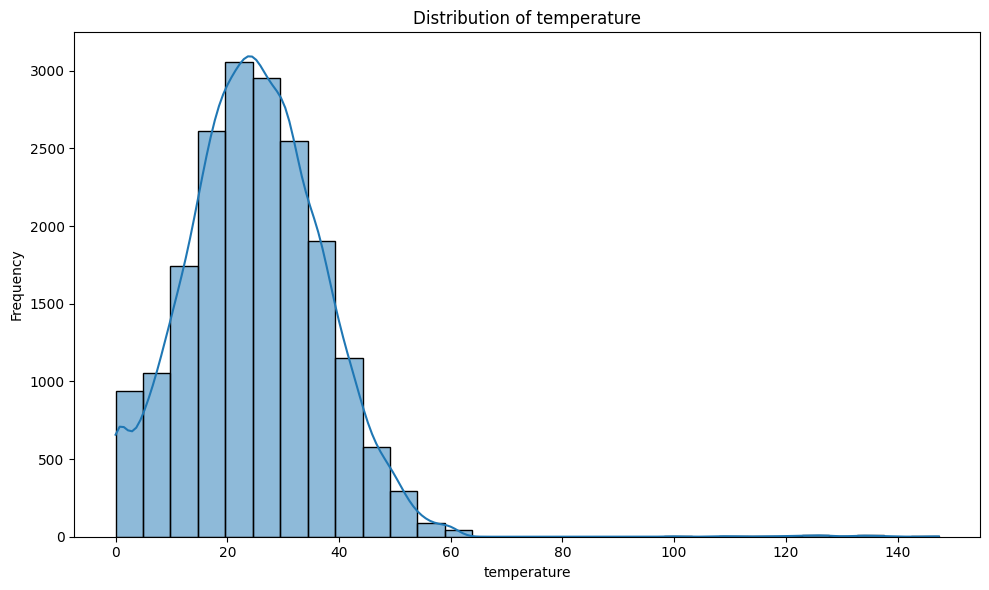

In [8]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'temperature')

In [9]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'irradiance')

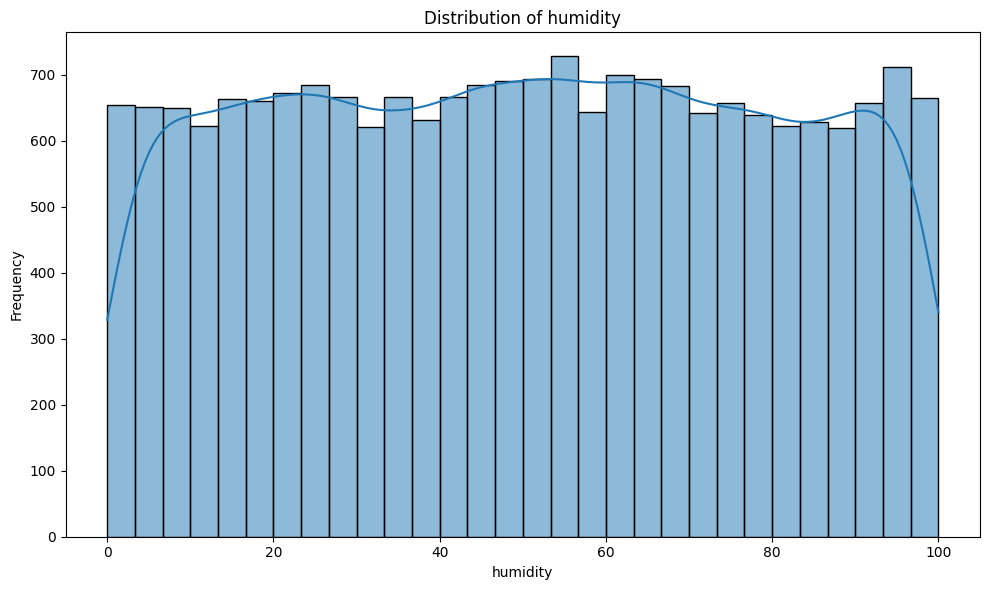

In [10]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'humidity')

In [11]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'panel_age')

In [12]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'maintenance_count')

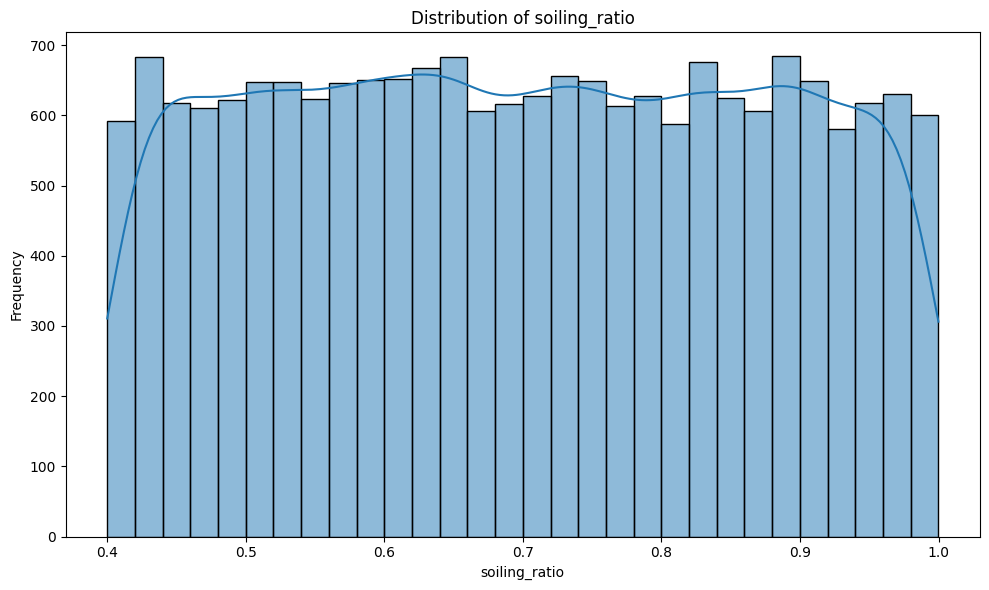

In [13]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'soiling_ratio')

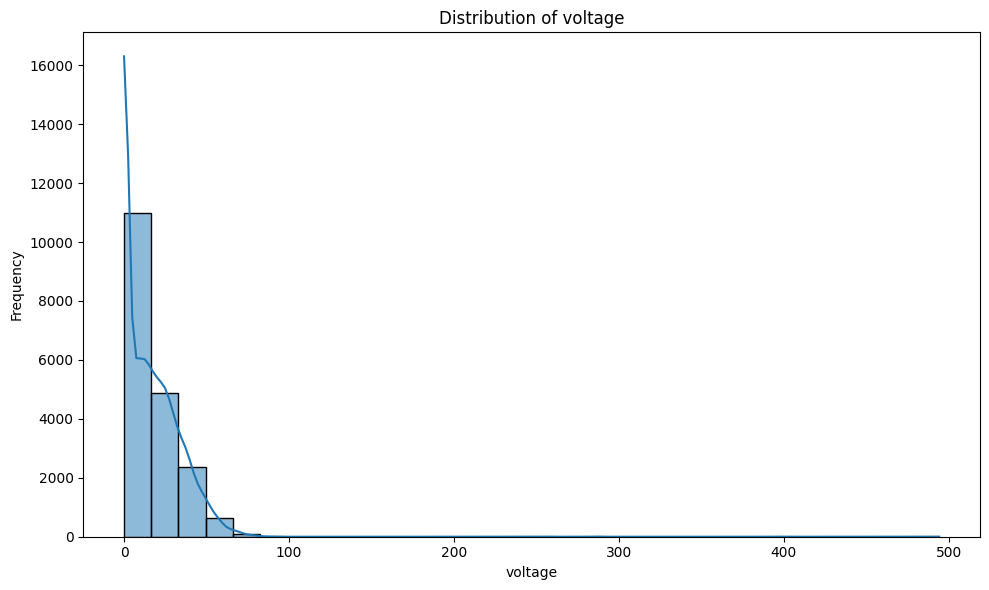

In [14]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'voltage')

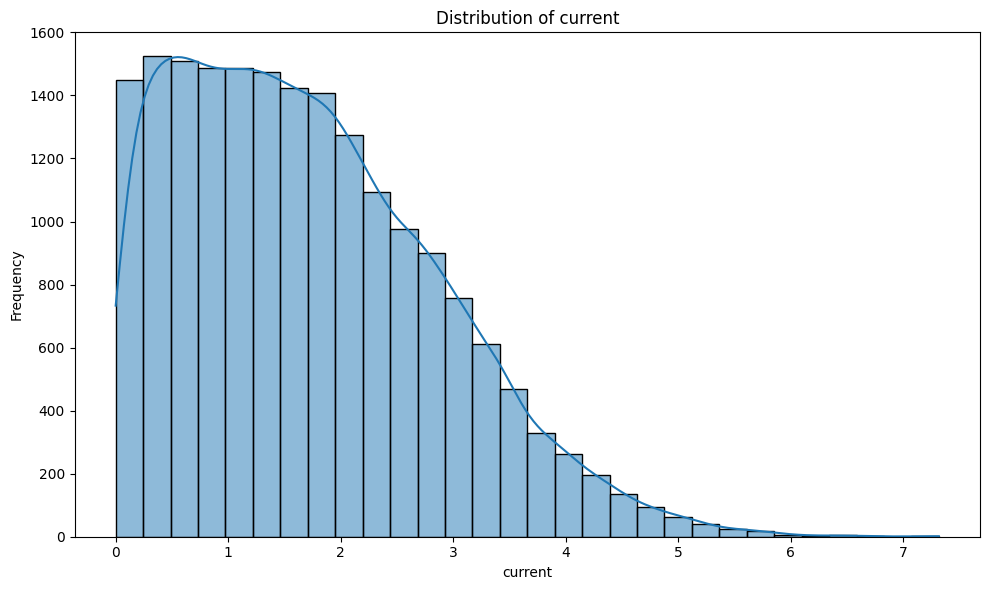

In [15]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'current')

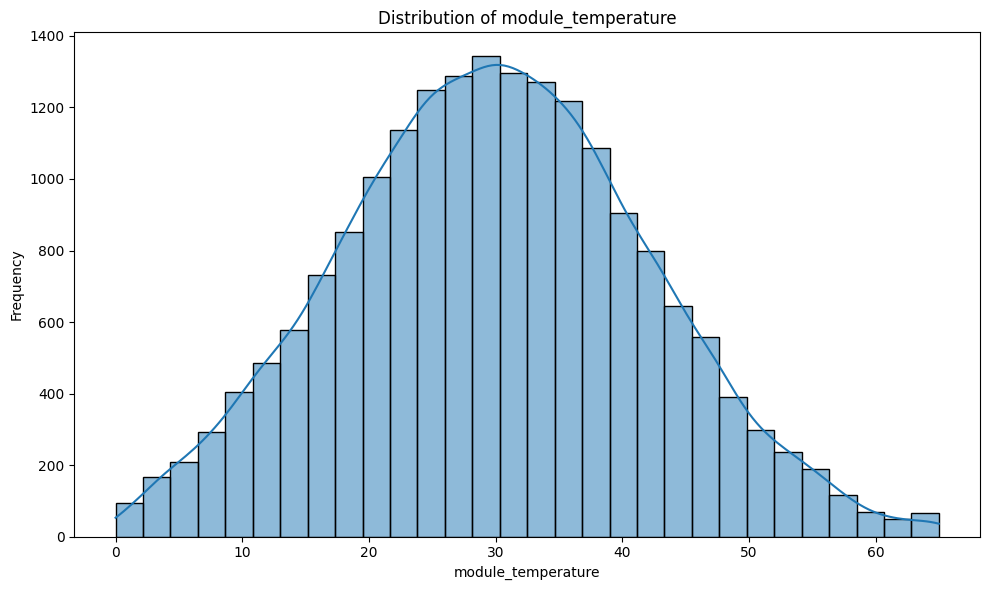

In [16]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'module_temperature')

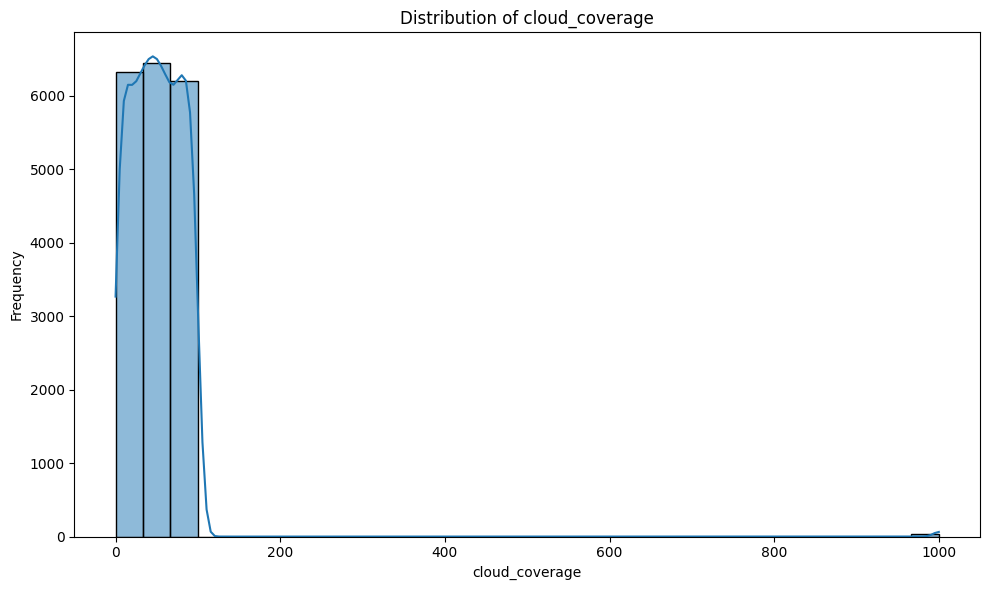

In [17]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'cloud_coverage')

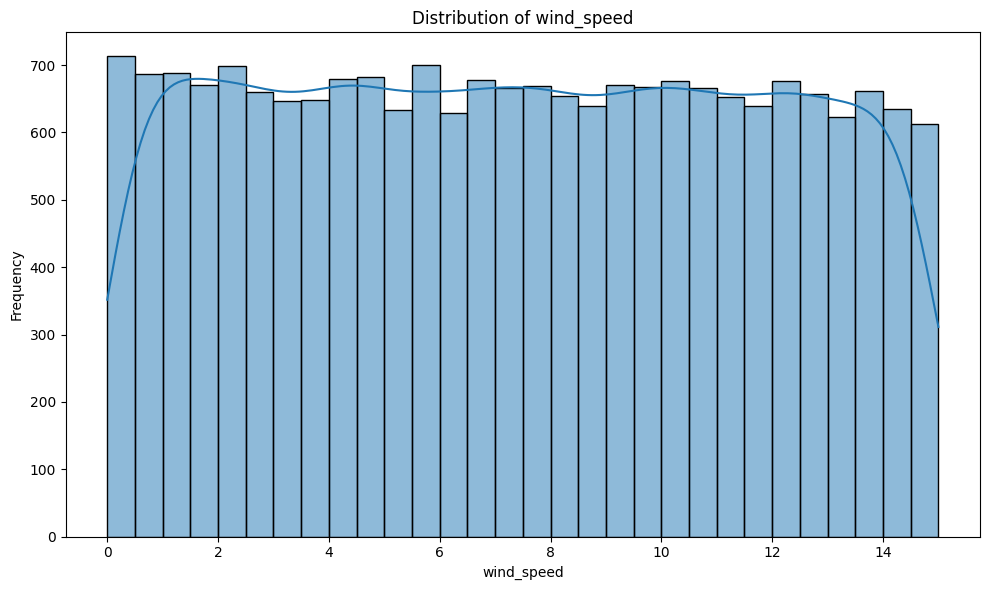

In [18]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'wind_speed')

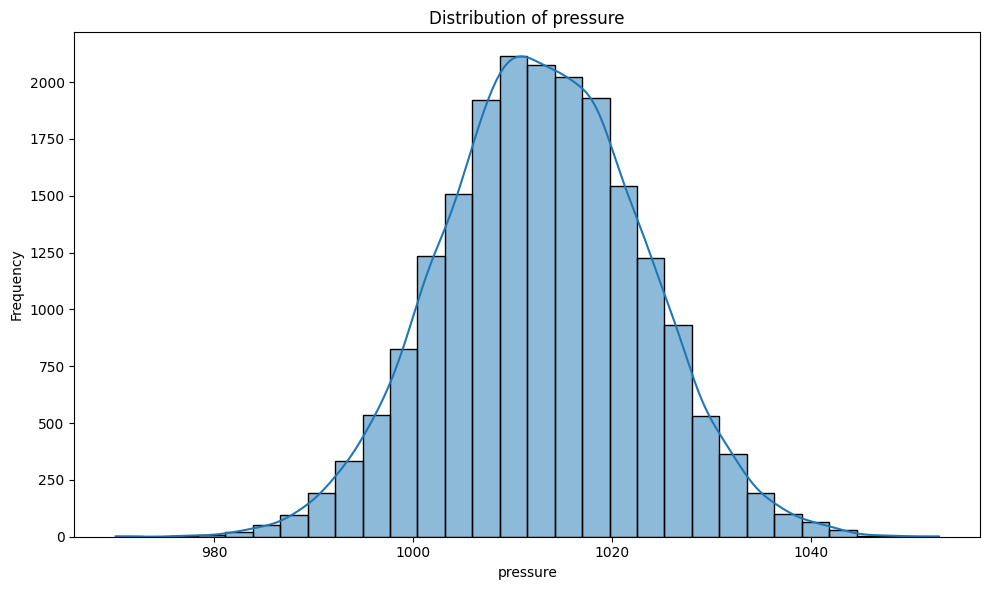

In [19]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'pressure')

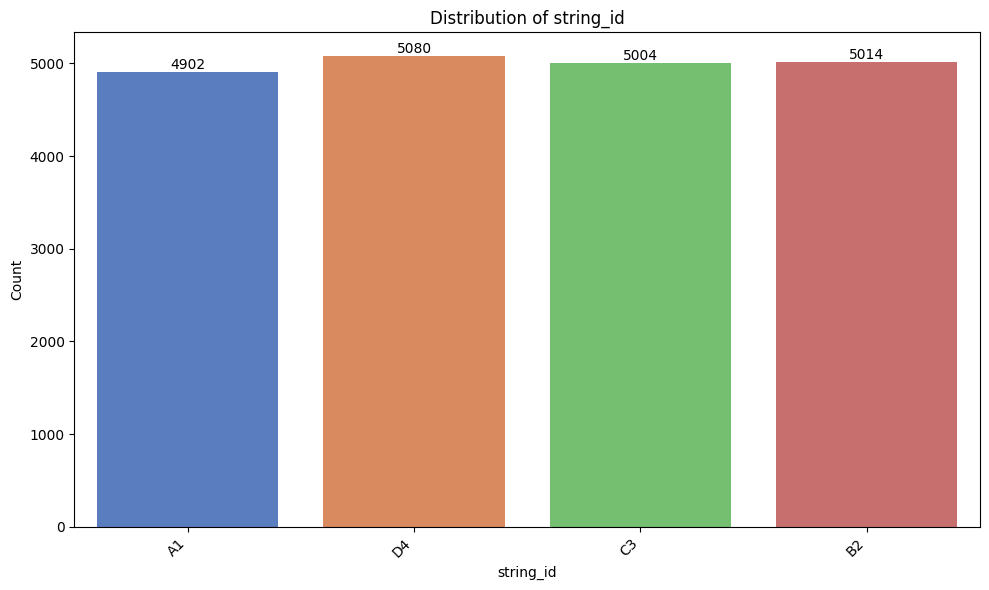

In [20]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'string_id')

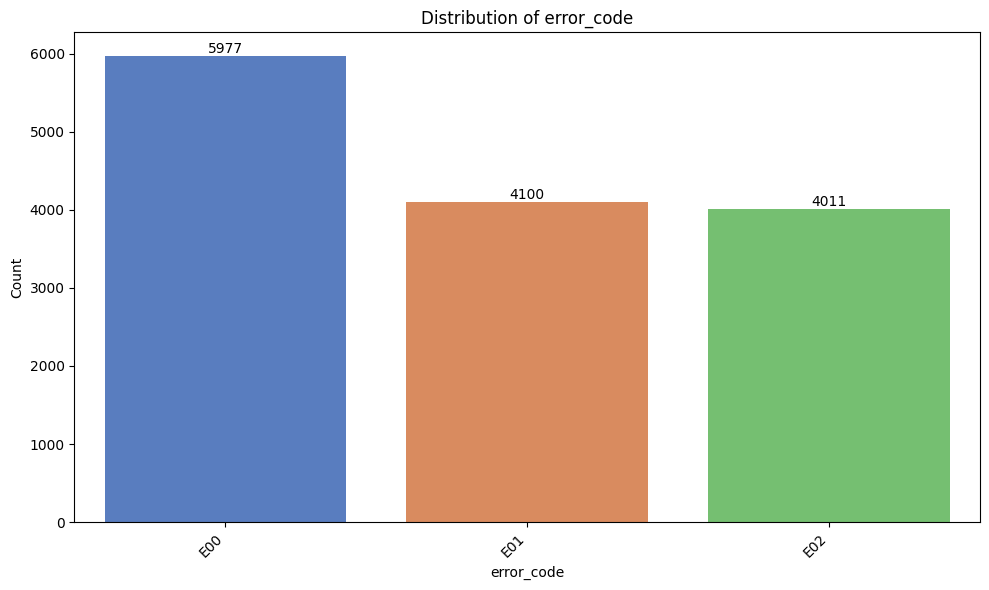

In [21]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'error_code')

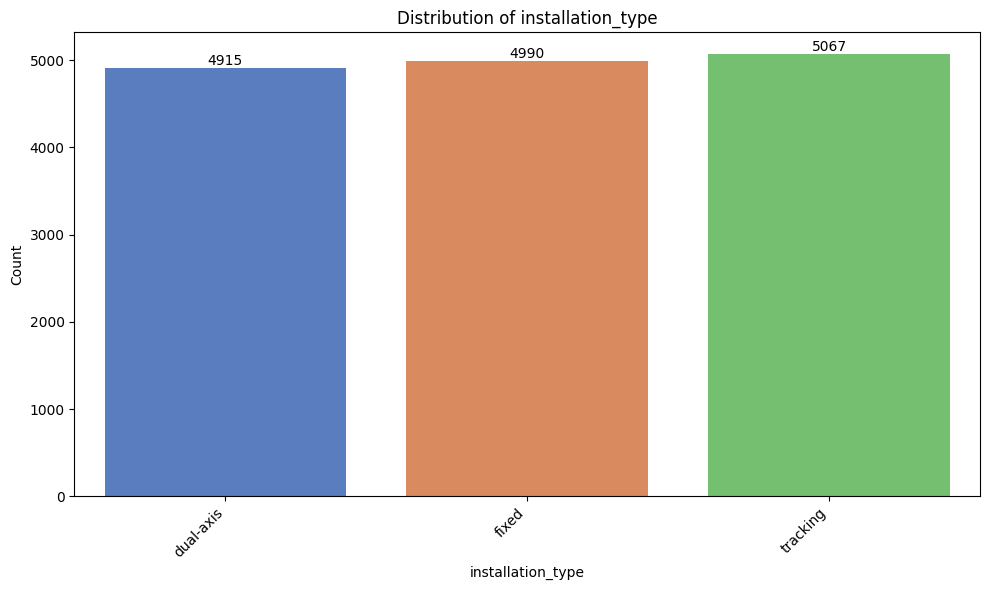

In [22]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'installation_type')

### **Insights from Univariate Analysis**

#### **Step 3: Univariate Analysis**

1. **Efficiency Distribution (Numerical Feature)**:
   - **Insight**: The distribution of `efficiency` is slightly skewed to the right, with most values concentrated around the middle range.
   - **Implication**: This suggests that most systems operate at a moderate efficiency level, with fewer systems at very low or very high efficiency.

2. **Temperature Distribution (Numerical Feature)**:
   - **Insight**: The `temperature` data shows a wide range of values, indicating that the solar panels are exposed to diverse environmental conditions. This variability can be due to seasonal changes, geographical location, or time of day.
   - **Implication**: Temperature is a critical factor in solar panel efficiency. As `temperature` increases, the efficiency of solar panels typically decreases due to increased electrical resistance. This means that in hotter climates or during peak sun hours, the panels may produce less energy than expected. Understanding this relationship helps in designing cooling systems or selecting materials that minimize efficiency loss.

3. **Irradiance Distribution (Numerical Feature)**
   - **Insight**: The distribution of `irradiance` values suggests that the panels receive varying levels of sunlight. This can be influenced by factors such as time of day, weather conditions, and shading from nearby objects.
   - **Implication**: Irradiance is directly proportional to the energy output of solar panels. Higher `irradiance` levels generally result in higher energy production. Therefore, optimizing panel placement to maximize sunlight exposure is crucial. This insight can guide decisions on panel orientation and tilt to capture maximum sunlight.

4. **Humidity Distribution (Numerical Feature)**
   - **Insight**: The variation in `humidity` levels indicates different atmospheric moisture conditions, which can affect solar panel performance.
   - **Implication**: High `humidity` can lead to condensation on the panel surface, reducing the amount of sunlight reaching the photovoltaic cells. Over time, this can also lead to corrosion or other damage, reducing the lifespan and efficiency of the panels. Understanding `humidity` patterns can inform maintenance schedules and the design of protective coatings.

5. **Panel Age Distribution (Numerical Feature)**
   - **Insight**: The dataset shows a range of `panel_age`, suggesting that some panels are newer while others have been in use for a longer period.
   - **Implication**: As panels age, their efficiency typically decreases due to factors like material degradation and exposure to environmental elements. Older panels may require more frequent maintenance or replacement to ensure optimal performance. This insight can help in planning for upgrades or replacements and in budgeting for long-term maintenance costs.

6. **Maintenance Count Distribution (Numerical Feature)**
   - **Insight**: The number of maintenance activities varies across the dataset, indicating different levels of upkeep for the solar panels.
   - **Implication**: Regular maintenance is crucial for the optimal performance and longevity of solar panels. Panels with higher `maintenance_counts` may be more reliable and efficient, as issues are likely addressed promptly. Conversely, panels with fewer maintenance activities might experience more frequent breakdowns or reduced efficiency. This insight can guide maintenance scheduling and resource allocation.

7. **Soiling Ratio Distribution (Numerical Feature)**
   - **Insight**: The `soiling_ratio`, which measures the level of dirt accumulation on the panels, varies across the dataset.
   - **Implication**: High soiling ratios can significantly reduce the efficiency of solar panels by blocking sunlight. Regular cleaning and monitoring of soiling levels are essential to maintain optimal energy production. This insight can inform cleaning schedules and the development of self-cleaning technologies or coatings.

8. **Voltage and Current Distribution (Numerical Feature)**
   - **Insight**: The `voltage` and `current` readings vary, reflecting different operational states and conditions of the solar panels.
   - **Implication**: Monitoring these electrical parameters is crucial for ensuring that the panels operate within safe and efficient ranges. Deviations from expected values can indicate issues such as shading, soiling, or equipment malfunction. This insight can guide troubleshooting and system optimization efforts.

9.  **Module Temperature Distribution (Numerical Feature)**
   - **Insight**: The `module_temperature` of the solar modules varies, which can affect their performance and efficiency.
   - **Implication**: High module temperatures can reduce efficiency and potentially damage the panels. Understanding `module_temperature` patterns can inform the design of cooling systems or the selection of materials that minimize heat absorption. This insight can also guide the placement of panels to avoid overheating.

10. **Cloud Coverage Distribution (Numerical Feature)**
   - **Insight**: `cloud_coverage` varies, affecting the amount of sunlight reaching the solar panels.
   - **Implication**: High `cloud_coverage` can reduce solar energy production by blocking sunlight. Understanding cloud patterns can inform energy production forecasts and the design of systems that compensate for reduced output during cloudy periods, such as energy storage solutions.

11. **Wind Speed Distribution (Numerical Feature)**
   - **Insight**: `wind_speed` vary, which can impact panel stability and cooling.
   - **Implication**: Higher `wind_speed` can cool panels, potentially improving efficiency by reducing temperatures. However, strong winds also pose a risk of physical damage to the panels or mounting structures. This insight can guide the design of robust mounting systems and inform site selection to balance cooling benefits with structural risks.

12. **Pressure Distribution (Numerical Feature)**
   - **Insight**: Atmospheric `pressure` varies, which might affect environmental conditions and solar panel performance.
   - **Implication**: `pressure` changes can influence weather patterns, indirectly affecting solar panel performance. Understanding `pressure` trends can aid in weather forecasting and energy production planning.

13. **String ID Distribution (Categorical Feature)**
   - **Insight**: Different `string_id`s indicate different panel groups or configurations within the solar array.
   - **Implication**: Analyzing performance by `string_id` can help identify underperforming groups and optimize system configuration. This insight can guide troubleshooting efforts and inform decisions on reconfiguring or upgrading specific strings.

14. **Error Code Distribution (Categorical Feature)** 
   - **Insight**: Various `error_code` are present, indicating different operational issues or faults.
   - **Implication**: Understanding `error_code` is essential for diagnosing and resolving operational issues. This insight can guide maintenance efforts and inform the development of automated monitoring and alert systems to quickly address faults.

15. **Installation Type Distribution (Categorical Feature)**:
   - **Insight**: The count plot shows that tracking is the most common `installation type`, followed by `fixed` and `dual-axis`.
   - **Implication**: This distribution may reflect industry preferences or technological trends, which could influence `efficiency` and maintenance strategies.

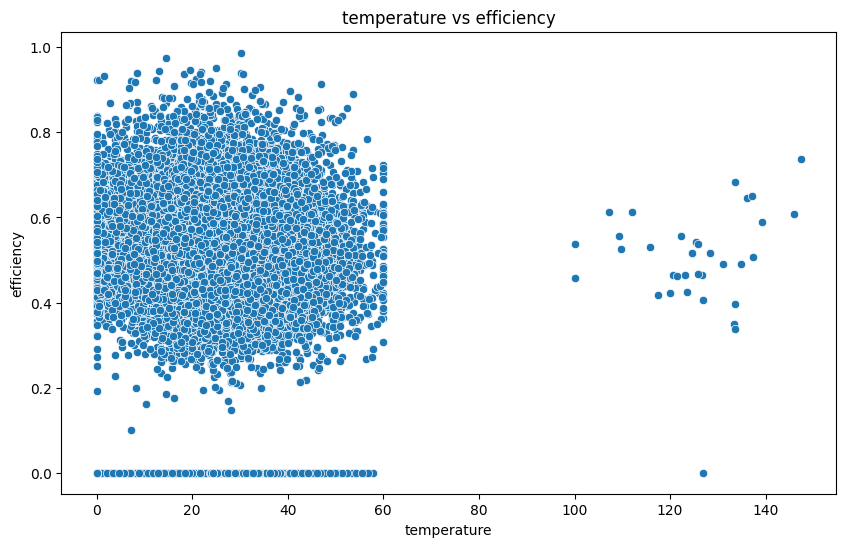

In [23]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'temperature', 'efficiency')

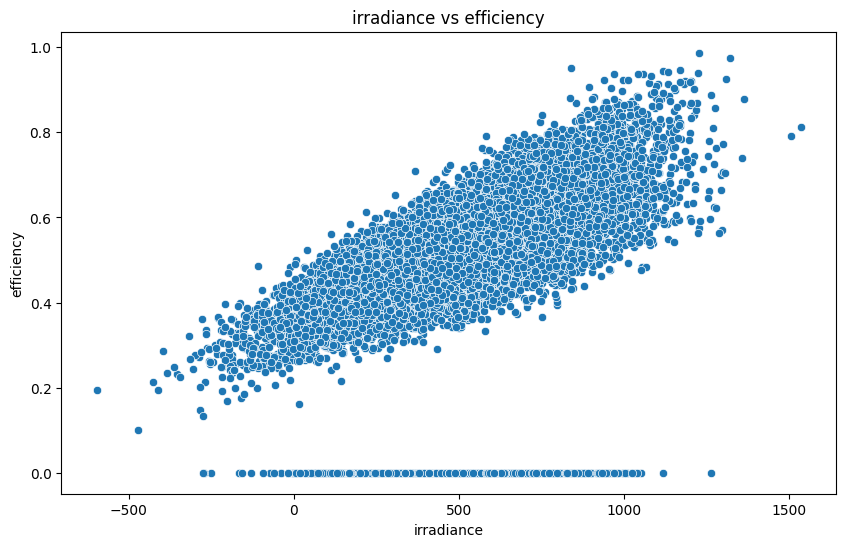

In [24]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'irradiance', 'efficiency')

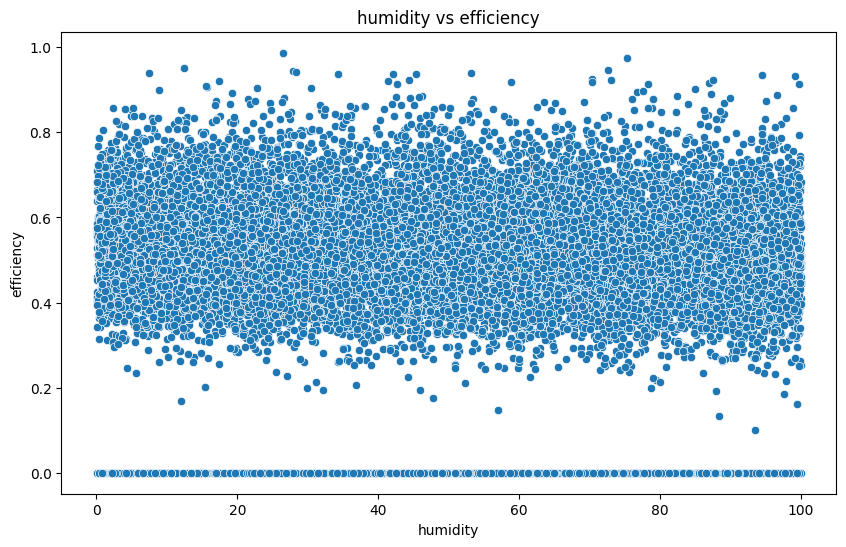

In [25]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'humidity', 'efficiency')

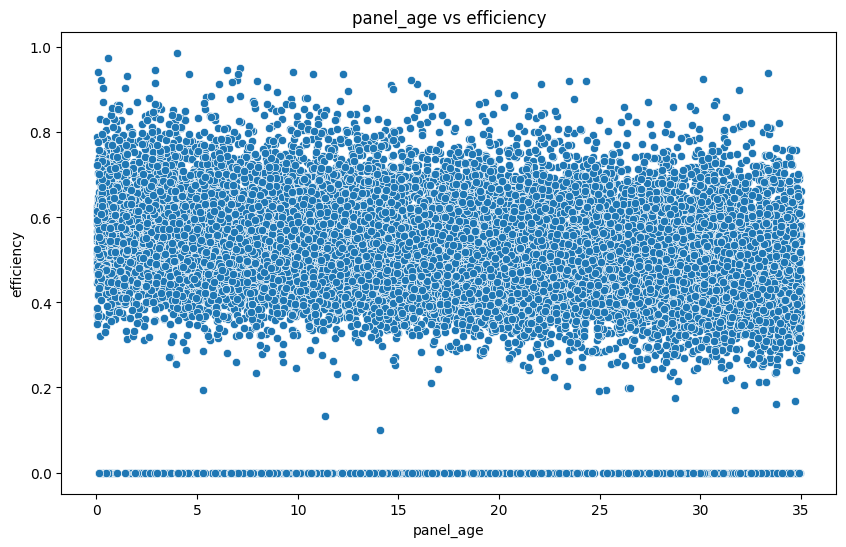

In [26]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'panel_age', 'efficiency')

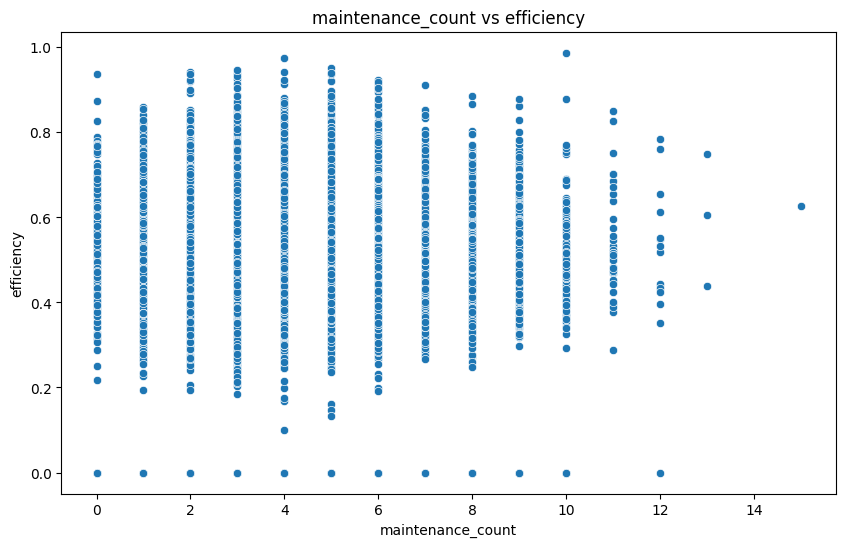

In [27]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'maintenance_count', 'efficiency')

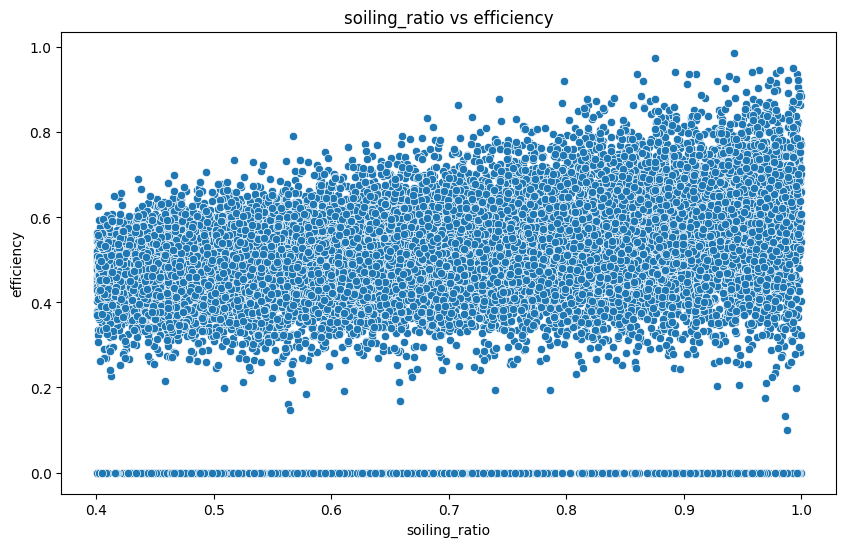

In [28]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'soiling_ratio', 'efficiency')

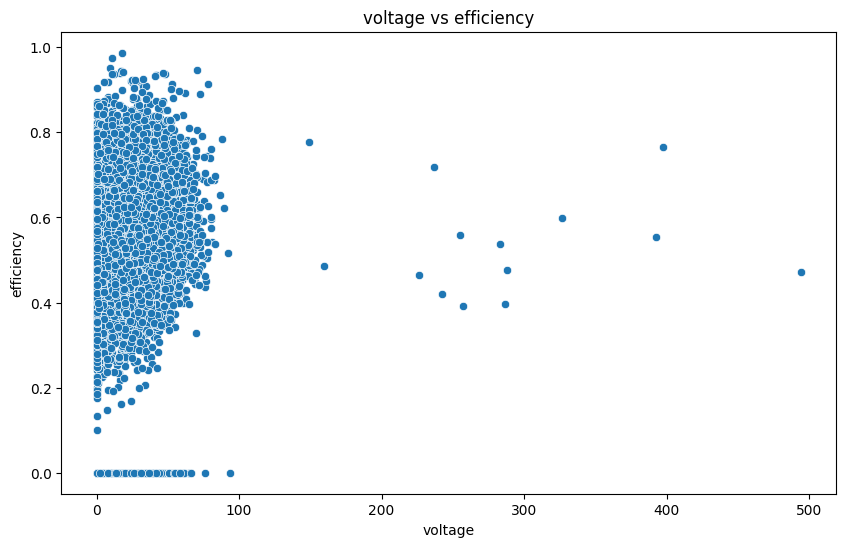

In [29]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'voltage', 'efficiency')

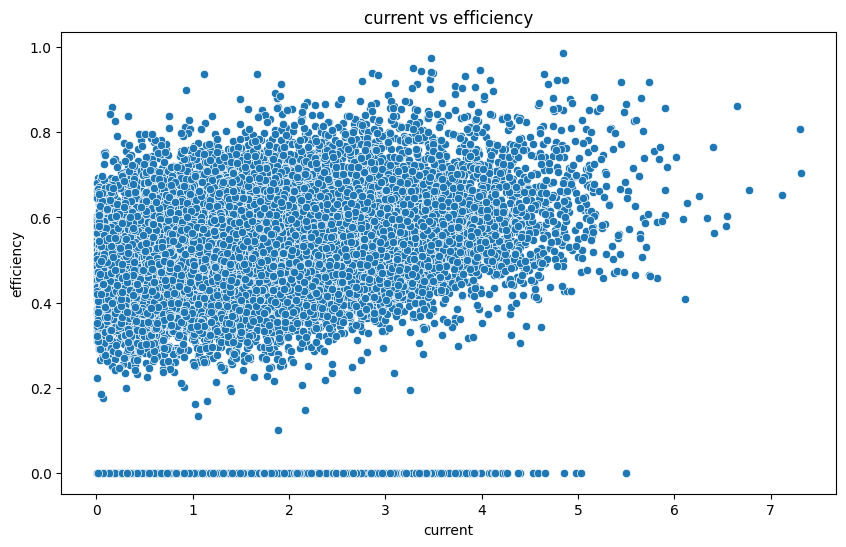

In [30]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'current', 'efficiency')

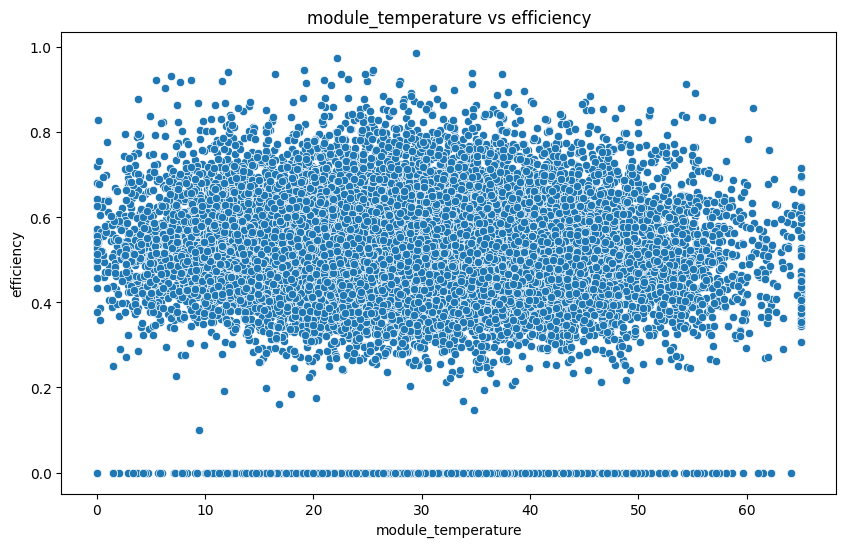

In [31]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'module_temperature', 'efficiency')

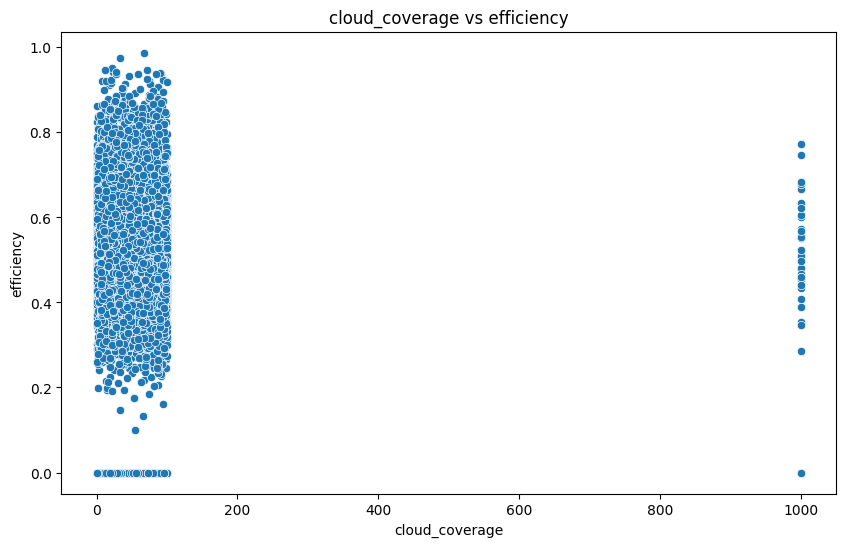

In [32]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'cloud_coverage', 'efficiency')

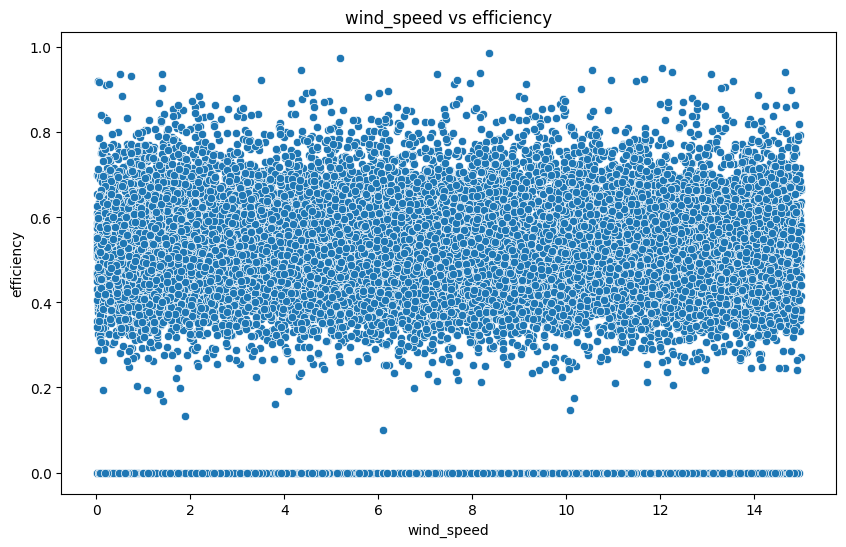

In [33]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'wind_speed', 'efficiency')

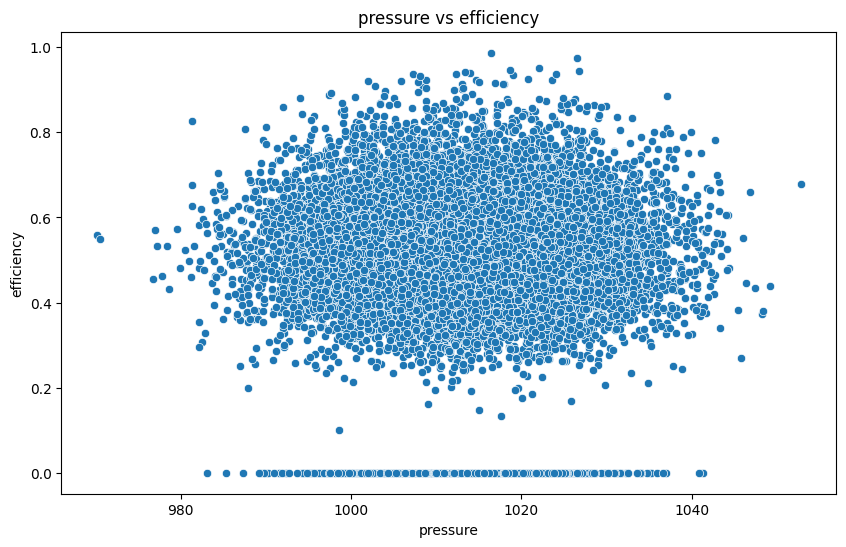

In [34]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'pressure', 'efficiency')

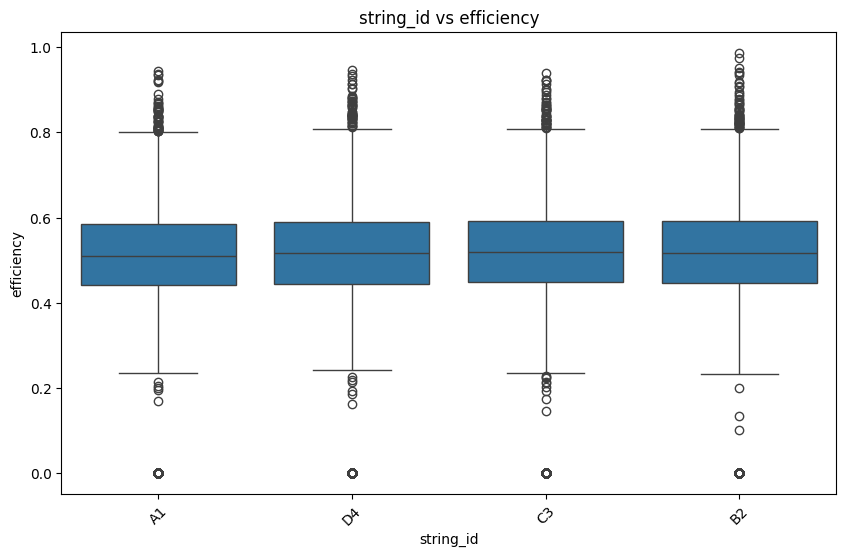

In [35]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'string_id', 'efficiency')

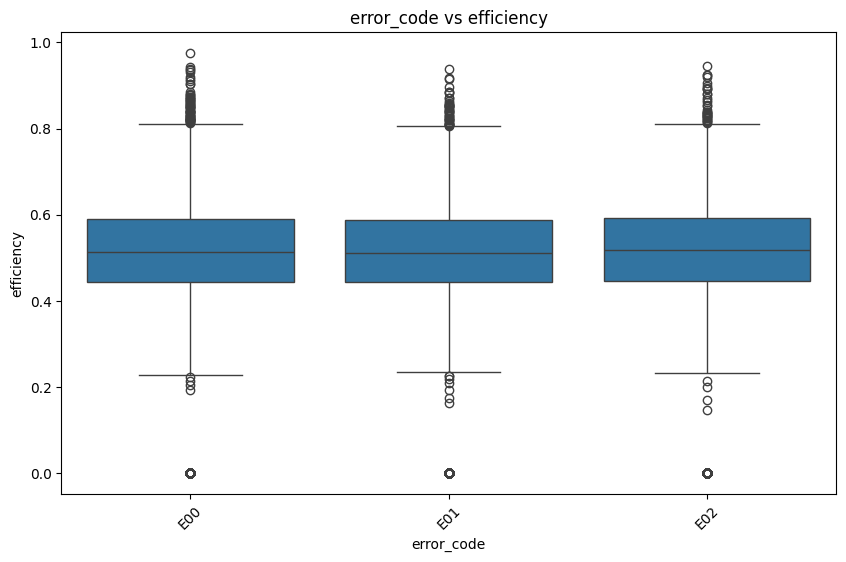

In [36]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'error_code', 'efficiency')

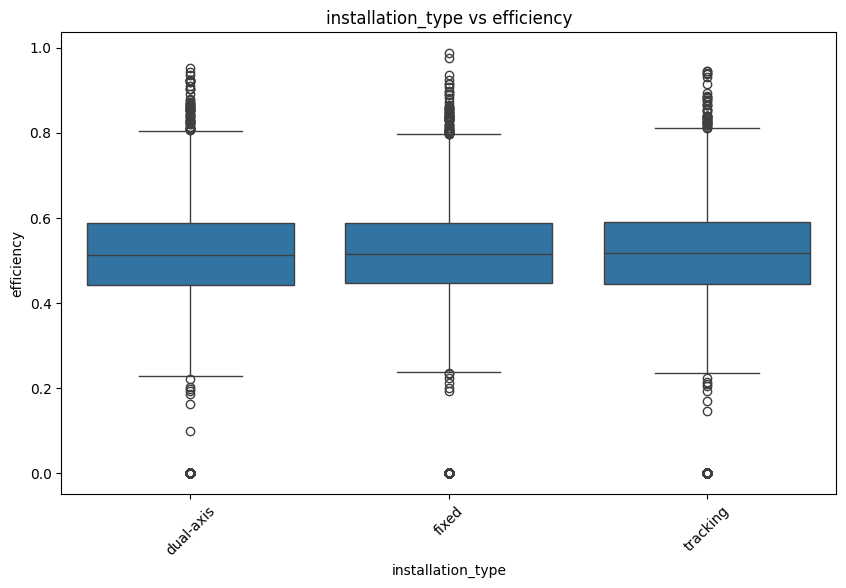

In [37]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'installation_type', 'efficiency')

c:\PEC-26\HACKATHONS\HackEarth\Analysis\analyze_src\bivariate_analysis.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


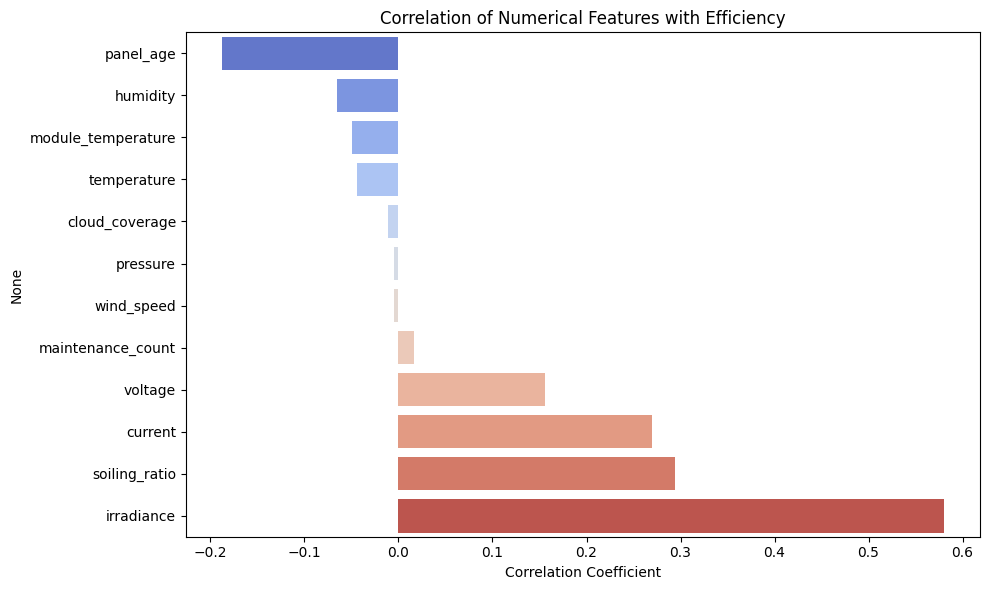

In [ ]:
# Analysing the Numerical features with the Target Variable

bivariate_analyzer.set_strategy(NumericalFeaturesVsTargetAnalysis())
bivariate_analyzer.execute_analysis(train_df, ['id', 'efficiency'], 'efficiency')

['string_id', 'error_code', 'installation_type']


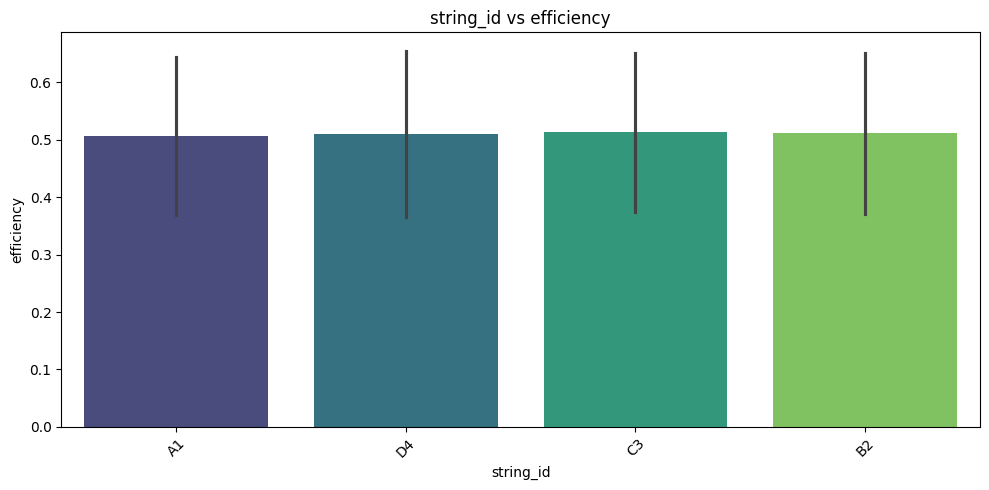

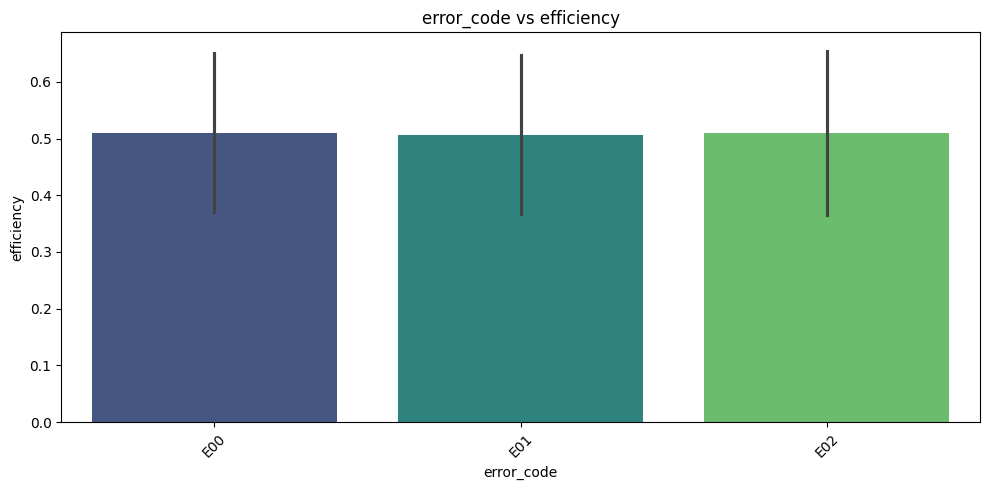

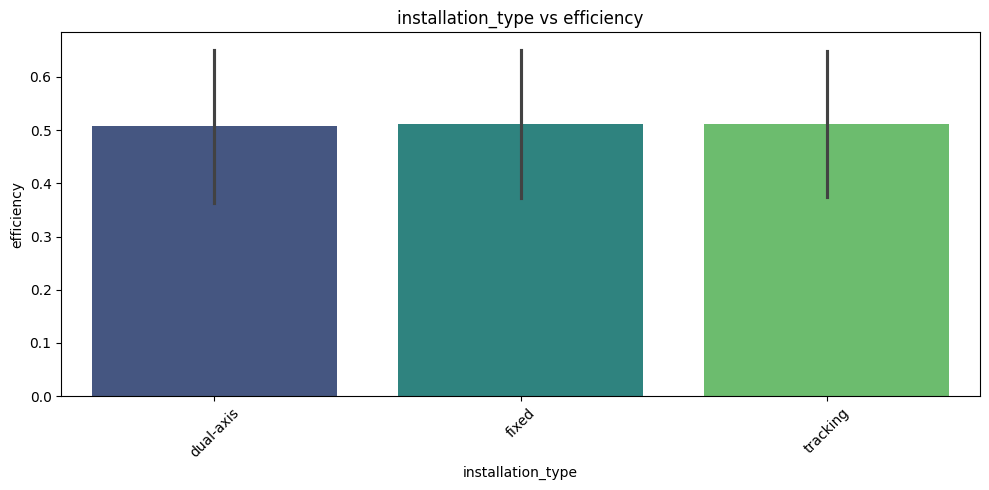

In [39]:
# Analysing the Categorical features with the Target variable

bivariate_analyzer.set_strategy(CategoricalFeaturesVsTargetAnalysis())
bivariate_analyzer.execute_analysis(train_df, [], 'efficiency')

### **Insights from Bivariate Analysis**

#### **Step 4: Bivariate Analysis**

1. **Temperature and Efficiency (Numerical vs. Numerical)**:
   - **Insight**: The scatter plot indicates a weak negative correlation between `temperature` and `efficiency`, suggesting that higher temperatures might slightly reduce efficiency.
   - **Implication**: This relationship could be important for optimizing system performance in different climates.

2. **Installation Type and Efficiency (Categorical vs. Numerical)**:
   - **Insight**: The box plot reveals that `dual-axis` installations tend to have higher median `efficiency` compared to `fixed` and `tracking` types.
   - **Implication**: This suggests that `dual-axis` installations might offer better performance, potentially justifying higher installation costs.

### **Summary**:
- **Key Predictors**: Based on the analysis, `installation_type` and `temperature` appear to be key predictors of `efficiency`. Further analysis could explore other potential predictors such as `irradiance` or `panel_age`.
- **Data Distribution**: The dataset shows a mix of normal and skewed distributions across different features, which may require transformations for certain analyses.
- **Outliers**: Outliers are present in the `efficiency` and `temperature` features, as indicated by the scatter and box plots. These outliers should be investigated further to determine their impact on analysis and modeling.


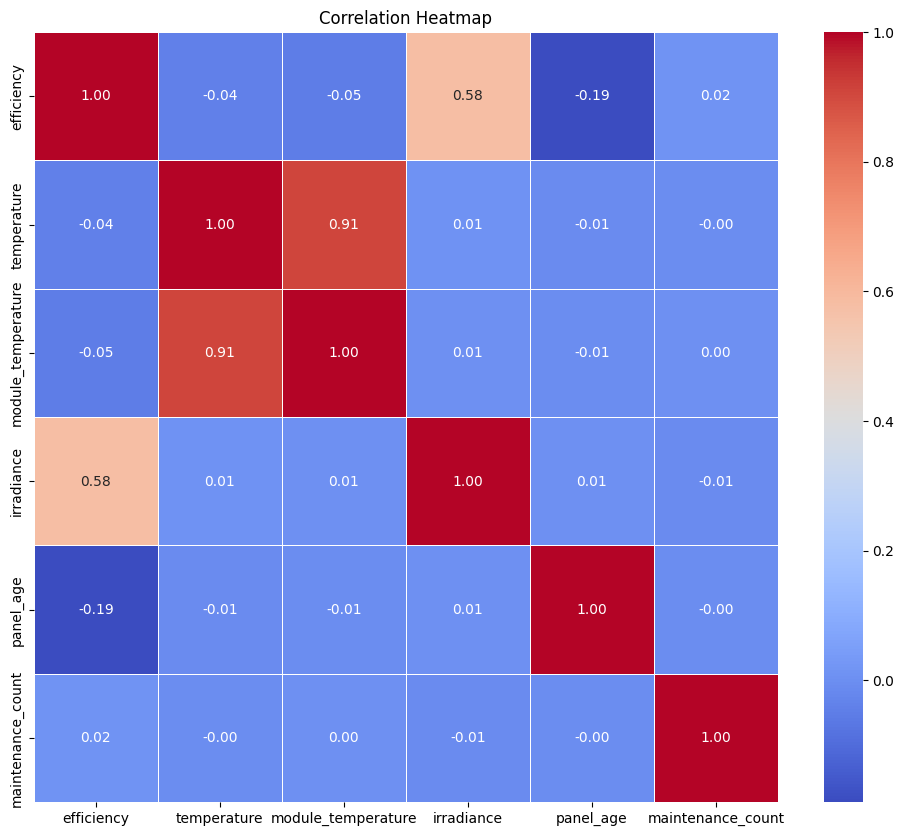

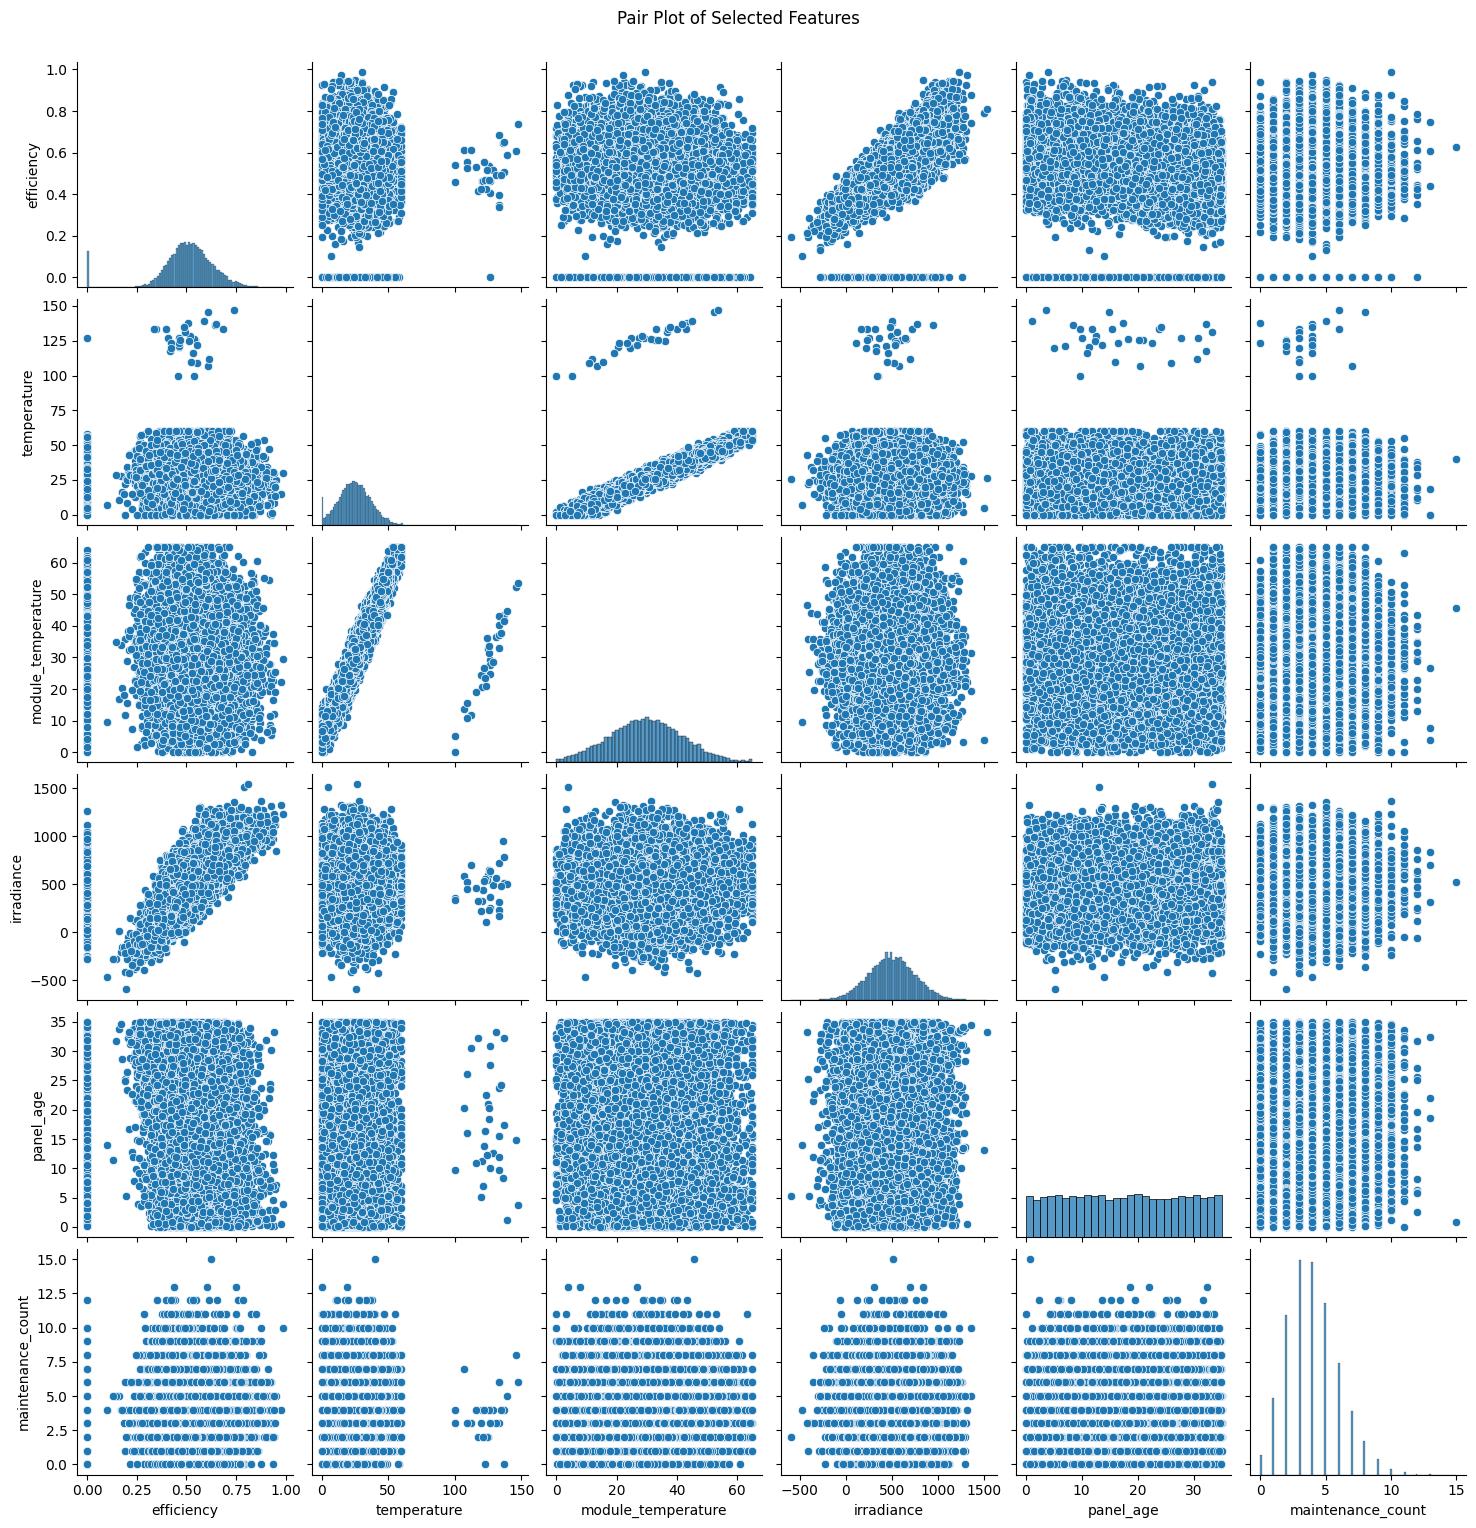

In [16]:

# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = train_df[['efficiency', 'temperature', 'module_temperature', 'irradiance', 'panel_age', 'maintenance_count']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)
